# **Best Model with Hyperparameter Tuning**

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# import the preprocessing libraries
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error


In [2]:
# load the dataset

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## Regression Problem


In [4]:
# Selecting X and y
X = df.drop(columns=['tip'] , axis = 1)
y = df['tip']

# encode the categorical data
X['sex'] = LabelEncoder().fit_transform(X['sex'])
X['smoker'] = LabelEncoder().fit_transform(X['smoker'])
X['day'] = LabelEncoder().fit_transform(X['day'])
X['time'] = LabelEncoder().fit_transform(X['time'])

# Train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [23]:
# create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGB Regressor': XGBRegressor()
}

model_performance = []

for name , model in models.items():
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)

    metric = mean_absolute_error(y_test , y_pred)
    model_performance.append((name,metric))

# select the best model
best_model = sorted(model_performance , key = lambda x: x[1] , reverse=False)
for model in best_model:
    print(f"Mean Absolute Error: {model[1]} for {model[0]}")


Mean Absolute Error: 0.5707097371316318 for SVR
Mean Absolute Error: 0.6703807496461157 for Linear Regression
Mean Absolute Error: 0.6721697168934103 for XGB Regressor
Mean Absolute Error: 0.7262448979591837 for KNeighbors Regressor
Mean Absolute Error: 0.7270379403006142 for Gradient Boosting Regressor
Mean Absolute Error: 0.7754938775510204 for Random Forest Regressor
Mean Absolute Error: 0.8736734693877551 for Decision Tree Regressor


In [22]:
# create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGB Regressor': XGBRegressor()
}

model_performance = []

for name , model in models.items():
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)

    metric = mean_squared_error(y_test , y_pred)
    model_performance.append((name,metric))

# select the best model
best_model = sorted(model_performance , key = lambda x: x[1] , reverse=False)
for model in best_model:
    print(f"Mean Squared Error: {model[1]} for {model[0]}")


Mean Squared Error: 0.538321847289585 for SVR
Mean Squared Error: 0.6948129686287711 for Linear Regression
Mean Squared Error: 0.7389215578875857 for XGB Regressor
Mean Squared Error: 0.8189078257405061 for Gradient Boosting Regressor
Mean Squared Error: 0.8382265306122448 for KNeighbors Regressor
Mean Squared Error: 0.91679211857143 for Random Forest Regressor
Mean Squared Error: 1.171177551020408 for Decision Tree Regressor


In [24]:
# create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGB Regressor': XGBRegressor()
}

model_performance = []

for name , model in models.items():
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)

    metric = r2_score(y_test , y_pred)
    model_performance.append((name,metric))

# select the best model
best_model = sorted(model_performance , key = lambda x: x[1] , reverse=False)
for model in best_model:
    print(f"R2 Score: {model[1]} for {model[0]}")


R2 Score: -0.08898659634413253 for Decision Tree Regressor
R2 Score: 0.2782378507269062 for Random Forest Regressor
R2 Score: 0.3294034029001649 for KNeighbors Regressor
R2 Score: 0.34396227433907334 for Gradient Boosting Regressor
R2 Score: 0.40884920227805865 for XGB Regressor
R2 Score: 0.4441368826121931 for Linear Regression
R2 Score: 0.5693326496439823 for SVR


## Hyperparameter Tuning



In [25]:
%%time

# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
          'RandomForestRegressor' : (RandomForestRegressor(), {'n_estimators': [10, 100]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2)}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators': [10, 100]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100]}),          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline
    pipeline = GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    
      
    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')



LinearRegression MSE:  0.6948129686287711
LinearRegression R2:  0.4441368826121931
LinearRegression MAE:  0.6703807496461157


SVR MSE:  1.460718141299992
SVR R2:  -0.1686013018011976
SVR MAE:  0.8935334948775431


DecisionTreeRegressor MSE:  0.8774153020453993
DecisionTreeRegressor R2:  0.298051667053291
DecisionTreeRegressor MAE:  0.7189481629481629


RandomForestRegressor MSE:  0.9848322991836743
RandomForestRegressor R2:  0.2121160993744723
RandomForestRegressor MAE:  0.7844040816326531


KNeighborsRegressor MSE:  0.6640950568462677
KNeighborsRegressor R2:  0.4687117753876745
KNeighborsRegressor MAE:  0.6203721488595437


GradientBoostingRegressor MSE:  0.8106801524004932
GradientBoostingRegressor R2:  0.35144101065487676
GradientBoostingRegressor MAE:  0.7657809818712309


XGBRegressor MSE:  0.6624107100882575
XGBRegressor R2:  0.4700592836840687
XGBRegressor MAE:  0.6549163442728472


CPU times: total: 10.3 s
Wall time: 10.1 s


**Assignment:** How to get best parameters of each model, write in the for loop among the code, how to get best model out of it?



In [26]:

# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'epsilon': [0.1, 0.01, 0.001]}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
          'RandomForestRegressor' : (RandomForestRegressor(), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'loss': ['ls', 'lad', 'huber', 'quantile'], 'n_estimators': [10, 100, 1000]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline
    pipeline = GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    
      
    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')


LinearRegression MSE:  0.6948129686287711
LinearRegression R2:  0.4441368826121931
LinearRegression MAE:  0.6703807496461157




**Assignment:** Find the errors

In [ ]:
# make a preprocessor

preprocessor = ColumnTransformer(
    transformers=['numeric_scaling', StandardScaler(), ['total_bill', 'size']], remainder='passthrough')


# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'epsilon': [0.1, 0.01, 0.001]}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
          'RandomForestRegressor' : (RandomForestRegressor(), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'loss': ['ls', 'lad', 'huber', 'quantile'], 'n_estimators': [10, 100, 1000]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline with preprocessor
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])   
    
    # make a grid search cv to tune the hyperparameter
    grid_search = GridSearchCV(pipeline, params, cv=5)
    
    
    # fit the pipeline
    grid_search.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = grid_search.predict(X_test)
    
      
    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')


In [1]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# dont show warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a dictionary of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Perform k-fold cross-validation and calculate the mean accuracy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X, y, cv=kfold)
    accuracy = np.mean(scores)
    print("Classifier:", name)
    print("Mean Accuracy:", accuracy)
    print()


Classifier: Logistic Regression
Mean Accuracy: 0.9733333333333334

Classifier: Decision Tree
Mean Accuracy: 0.9533333333333335

Classifier: Random Forest
Mean Accuracy: 0.9533333333333335

Classifier: SVM
Mean Accuracy: 0.9666666666666668

Classifier: KNN
Mean Accuracy: 0.9733333333333334



In [31]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [33]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [34]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

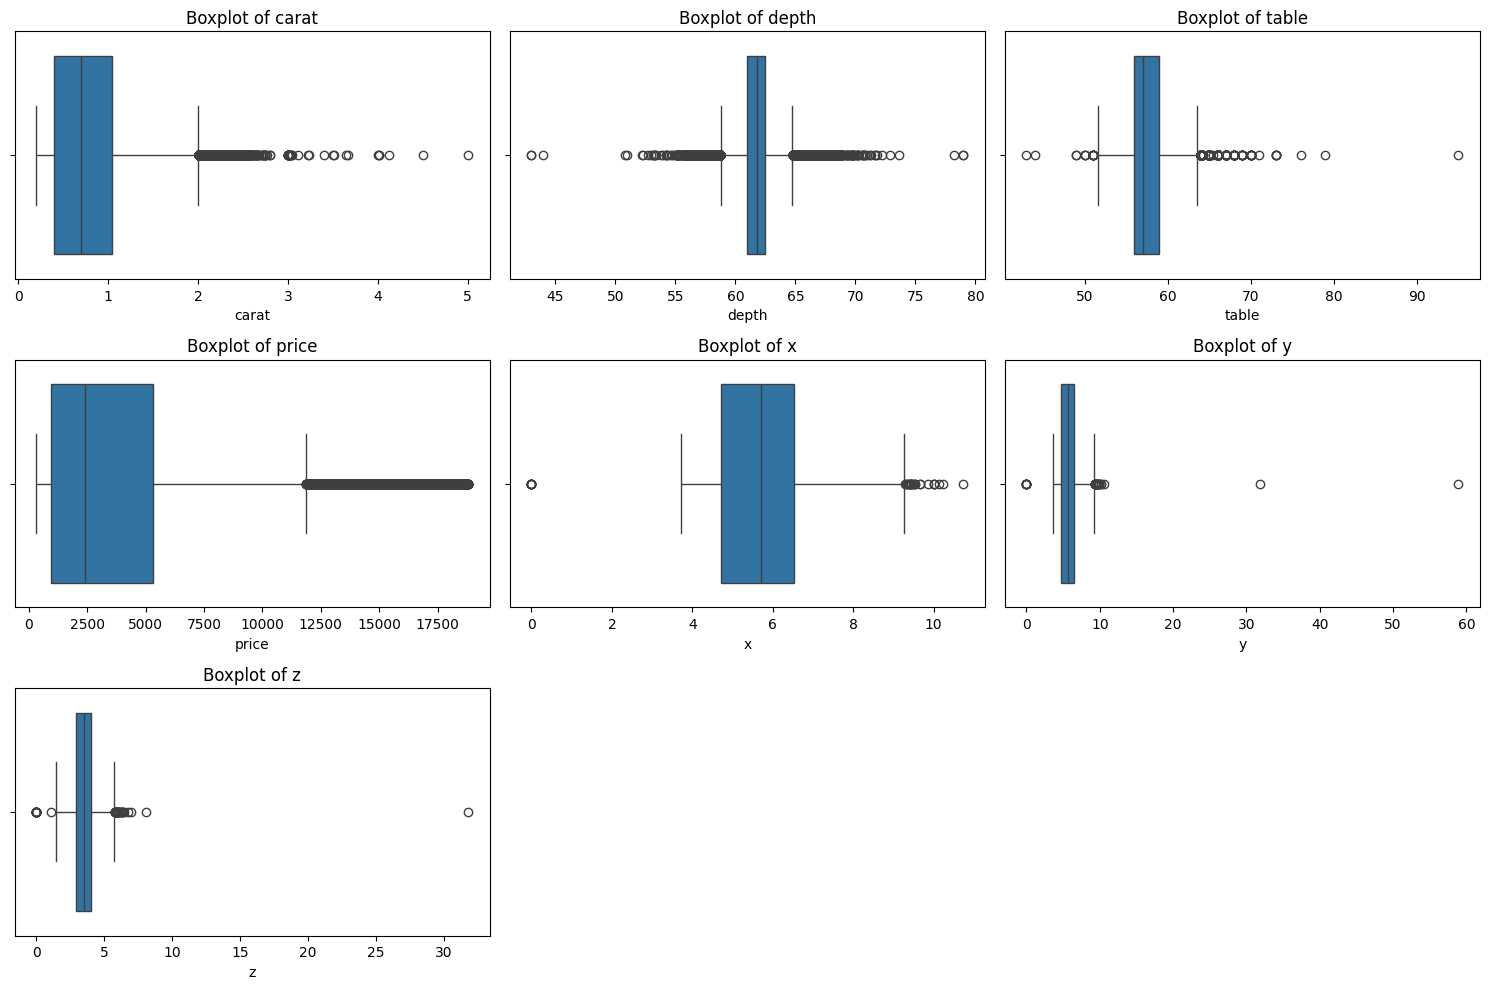

Number of outliers in each numeric column:
carat: 1889
depth: 2545
table: 605
price: 3540
x: 32
y: 29
z: 49


In [35]:

numeric = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# Identify outliers using IQR method
outliers = {}
for col in numeric.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print("Number of outliers in each numeric column:")
for col, count in outliers.items():
    print(f"{col}: {count}")

In [36]:

# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_cleaned = remove_outliers(df, numeric_columns)

# Print the number of rows removed
rows_removed = df.shape[0] - df_cleaned.shape[0]
print(f"Number of rows removed: {rows_removed}")

# Update the original dataframe
df = df_cleaned.copy()

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df.head())

# Display updated summary statistics
print("\nUpdated summary statistics:")
print(df.describe())


Number of rows removed: 7408

First few rows of the cleaned dataset:
   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48

Updated summary statistics:
              carat         depth         table         price             x  \
count  46532.000000  46532.000000  46532.000000  46532.000000  46532.000000   
mean       0.697966     61.804302     57.238621   2999.000107      5.521339   
std        0.362025      1.077341      2.013841   2598.654394      0.964476   
min        0.200000     59.000000     52.000000    326.000000      3.730000   
25%        0.370000     61.200000     56.000000    880.000000      4.

In [37]:
df.shape

(46532, 10)

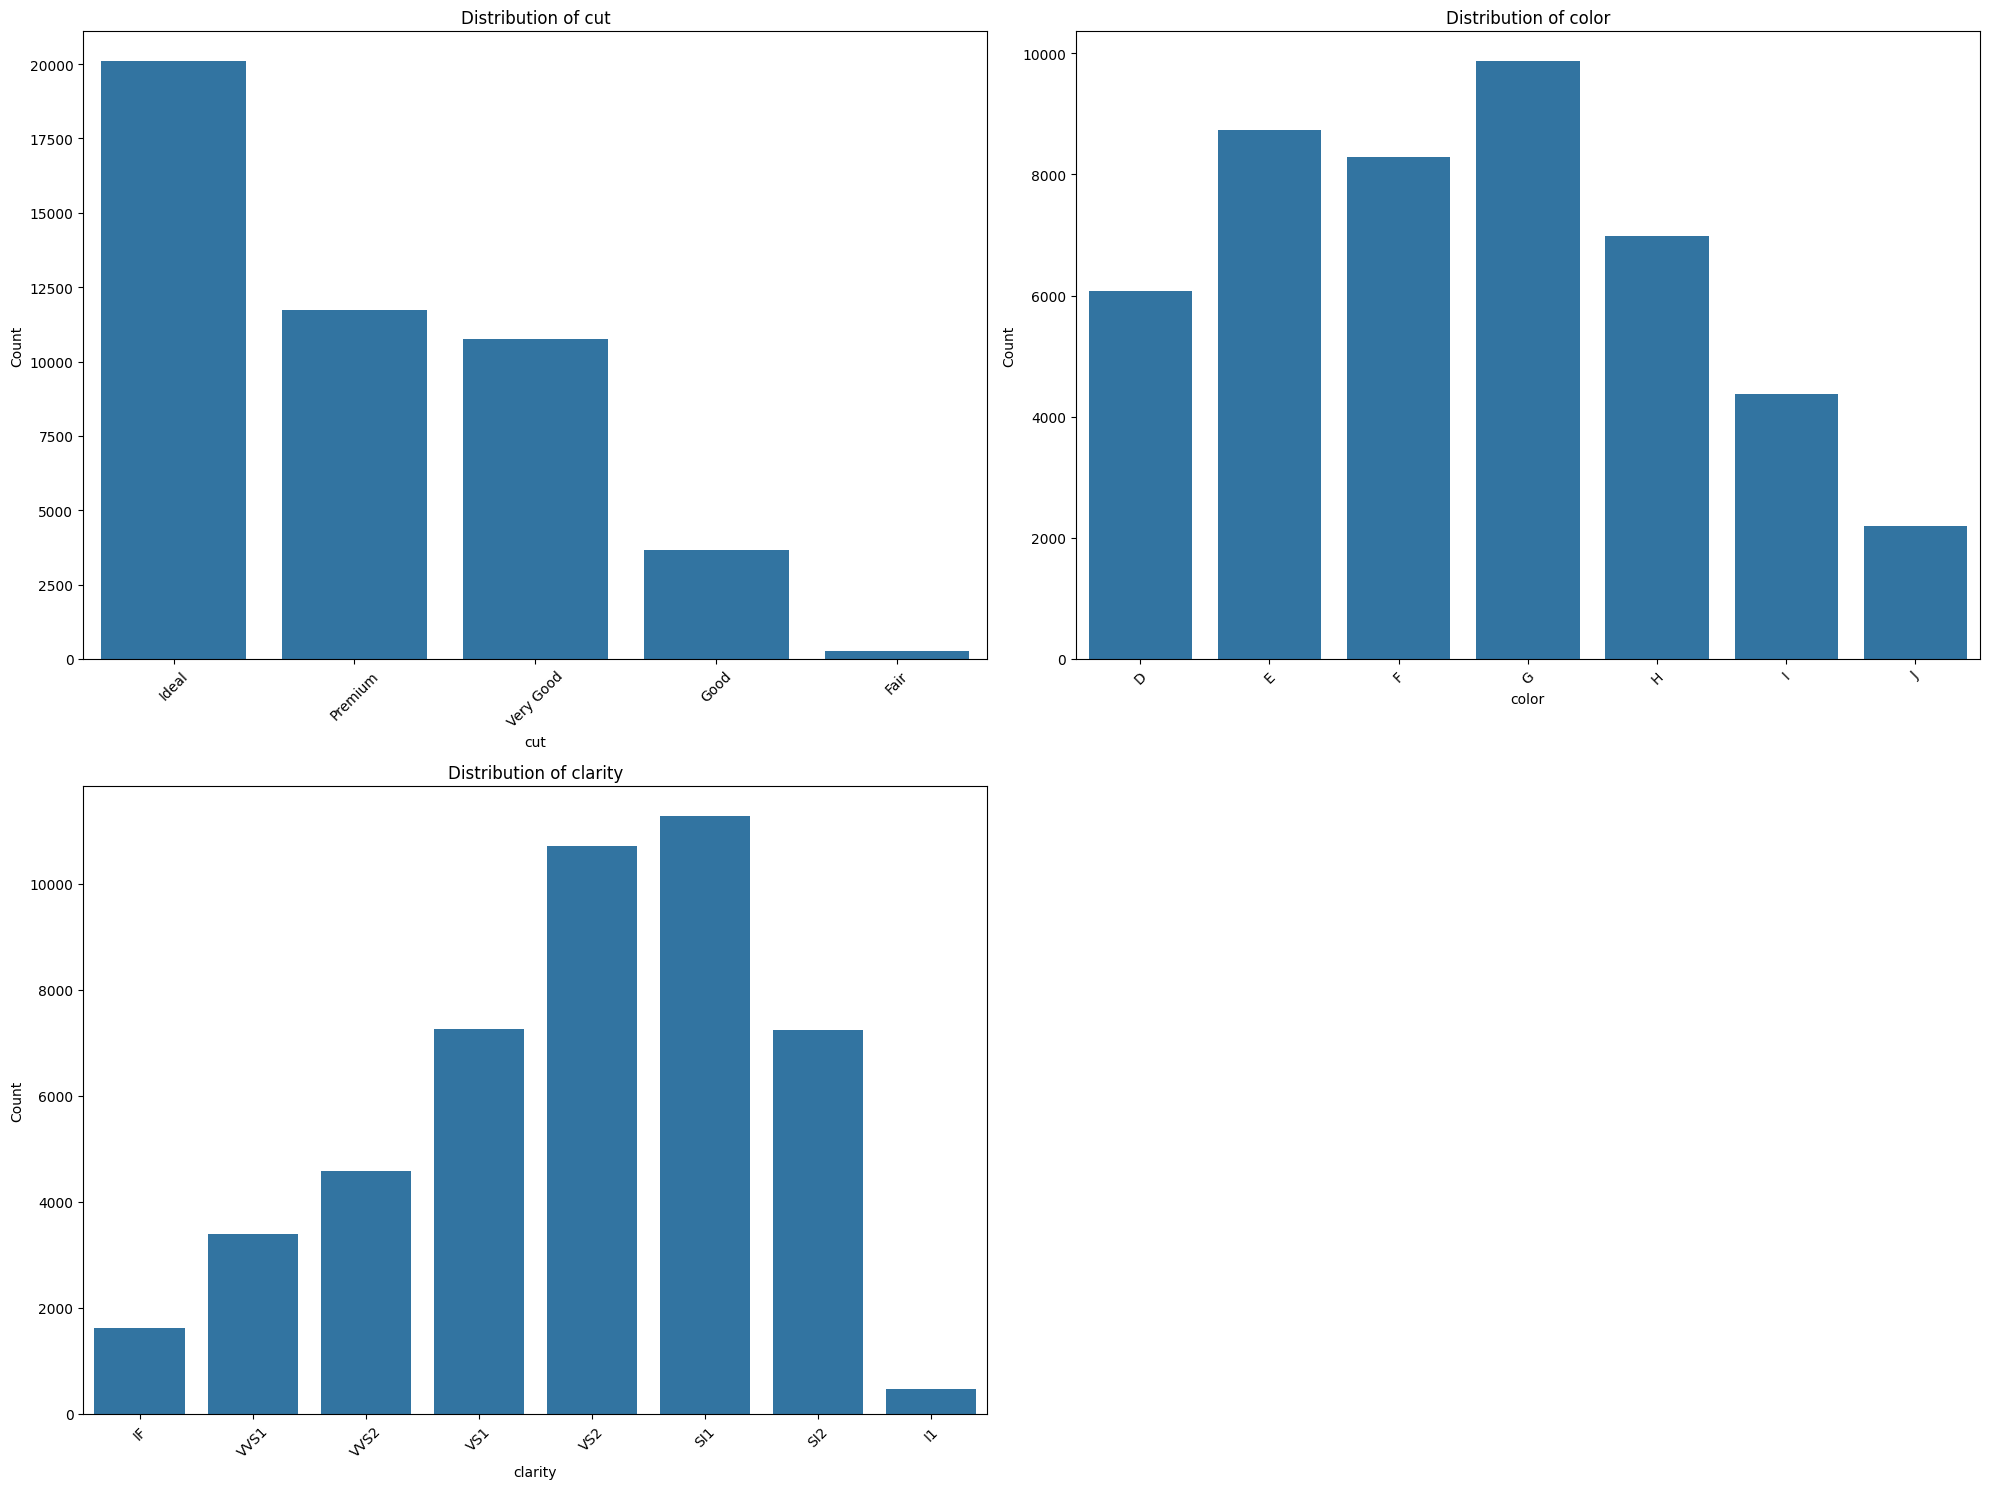

In [38]:
# Check the distribution of categorical and object columns
plt.figure(figsize=(20, 15))
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [41]:
X = df.drop(columns='cut' , axis=1)
y = df['cut']

le = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Split the data again after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

# Create a dictionary of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Initialize a dictionary to store the results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on training and test sets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Store the results
    results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    }

# Print the results
print("Model Performance:")
for name, scores in results.items():
    print(f"{name}:")
    print(f"  Training Accuracy: {scores['train_accuracy']:.4f}")
    print(f"  Testing Accuracy: {scores['test_accuracy']:.4f}")
    print()

# Find the best model based on test accuracy
best_model = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"Best Model: {best_model}")
print(f"Best Test Accuracy: {results[best_model]['test_accuracy']:.4f}")

# Get the best classifier
best_classifier = classifiers[best_model]

# Perform a detailed evaluation of the best model
y_pred = best_classifier.predict(X_test)
print("\nDetailed Evaluation of the Best Model:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\Hamad\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance:
Logistic Regression:
  Training Accuracy: 0.4305
  Testing Accuracy: 0.4342

Decision Tree:
  Training Accuracy: 0.9999
  Testing Accuracy: 0.7074

Random Forest:
  Training Accuracy: 0.9999
  Testing Accuracy: 0.7866

SVM:
  Training Accuracy: 0.4311
  Testing Accuracy: 0.4350

KNN:
  Training Accuracy: 0.6971
  Testing Accuracy: 0.5731

Best Model: Random Forest
Best Test Accuracy: 0.7866

Detailed Evaluation of the Best Model:
              precision    recall  f1-score   support

        Fair       0.91      0.58      0.71        67
        Good       0.80      0.72      0.76       717
       Ideal       0.83      0.91      0.87      4049
     Premium       0.78      0.80      0.79      2376
   Very Good       0.68      0.55      0.61      2098

    accuracy                           0.79      9307
   macro avg       0.80      0.71      0.75      9307
weighted avg       0.78      0.79      0.78      9307


Confusion Matrix:
[[  39    8    5    8    7]
 [   4  514